In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
assets = ['BTC-USD' , 'ETH-USD' , 'ADA-USD' , 'TRX-USD' , 'BNB-USD' , 'XRP-USD' , 'MATIC-USD' , 'LINK-USD' , 'LTC-USD']

In [7]:
df = pd.DataFrame()
df_return = pd.DataFrame()
for a in assets: 
    print(f'Download crypto of {a}')
    df[a +'Close'] = yf.download(a,start='2021-01-01',interval='1mo')['Close']
    print(f'Calculate of Return {a}')
    df_return[a+'_Returned'] = df[a +'Close'].pct_change()
    

Download crypto of BTC-USD
[*********************100%***********************]  1 of 1 completed
Calculate of Return BTC-USD
Download crypto of ETH-USD
[*********************100%***********************]  1 of 1 completed
Calculate of Return ETH-USD
Download crypto of ADA-USD
[*********************100%***********************]  1 of 1 completed
Calculate of Return ADA-USD
Download crypto of TRX-USD
[*********************100%***********************]  1 of 1 completed
Calculate of Return TRX-USD
Download crypto of BNB-USD
[*********************100%***********************]  1 of 1 completed
Calculate of Return BNB-USD
Download crypto of XRP-USD
[*********************100%***********************]  1 of 1 completed
Calculate of Return XRP-USD
Download crypto of MATIC-USD
[*********************100%***********************]  1 of 1 completed
Calculate of Return MATIC-USD
Download crypto of LINK-USD
[*********************100%***********************]  1 of 1 completed
Calculate of Return LINK-USD
Do

In [16]:
df.head()

,BTC-USDClose,ETH-USDClose,ADA-USDClose,TRX-USDClose,BNB-USDClose,XRP-USDClose,MATIC-USDClose,LINK-USDClose,LTC-USDClose
Date,,,,,,,,,
2021-01-01,33114.359375,1314.986206,0.344898,0.031603,44.275993,0.492314,0.038279,22.598434,129.570816
2021-02-01,45137.769531,1416.048950,1.308059,0.045647,209.574402,0.414953,0.228847,24.663532,164.927170
2021-03-01,58918.832031,1918.362061,1.193264,0.092312,302.063446,0.573869,0.359934,29.351137,197.499100
2021-04-01,57750.175781,2773.207031,1.352449,0.132229,624.080566,1.591674,0.820568,38.128506,271.167084
2021-05-01,37332.855469,2714.945312,1.742778,0.076920,354.329346,1.046584,1.881024,32.088585,188.033676


In [8]:
df_return.head()

,BTC-USD_Returned,ETH-USD_Returned,ADA-USD_Returned,TRX-USD_Returned,BNB-USD_Returned,XRP-USD_Returned,MATIC-USD_Returned,LINK-USD_Returned,LTC-USD_Returned
Date,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,0.363088,0.076855,2.792597,0.444388,3.733364,-0.157138,4.978395,0.091382,0.272873
2021-03-01,0.305311,0.354729,-0.087760,1.022302,0.441318,0.382973,0.572815,0.190062,0.197493
2021-04-01,-0.019835,0.445612,0.133403,0.432414,1.066058,1.773584,1.279774,0.299047,0.373004
2021-05-01,-0.353546,-0.021009,0.288609,-0.418282,-0.432238,-0.342463,1.292344,-0.158410,-0.306576


In [9]:
def CAGR(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    n = len(df)/12
    CAGR = (df["cum_return"].tolist()[-1])**(1/n) - 1
    return CAGR

def volatility(DF):
    df = DF.copy()
    vol = df["mon_ret"].std() * np.sqrt(12)
    return vol

def sharpe(DF,rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr
    
def max_dd(DF):
    df = DF.copy()
    df["cum_return"] = (1 + df["mon_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd


In [10]:
def pflio(DF,m,x):
    df = DF.copy()
    portfolio = []
    monthly_ret = [0]
    for i in range(1,len(df)):
        if len(portfolio) > 0:
            monthly_ret.append(df[portfolio].iloc[i,:].mean())
            bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x].index.values.tolist()
            portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        new_picks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.values.tolist()
        portfolio = portfolio + new_picks
        print(portfolio)
    monthly_ret_df = pd.DataFrame(np.array(monthly_ret),columns=["mon_ret"])
    return monthly_ret_df

In [11]:
portfo_ret = pflio(df_return,6,3)

['MATIC-USD_Returned', 'BNB-USD_Returned', 'ADA-USD_Returned', 'TRX-USD_Returned', 'BTC-USD_Returned', 'LTC-USD_Returned']
['MATIC-USD_Returned', 'BNB-USD_Returned', 'TRX-USD_Returned', 'TRX-USD_Returned', 'MATIC-USD_Returned', 'BNB-USD_Returned']
['MATIC-USD_Returned', 'MATIC-USD_Returned', 'XRP-USD_Returned', 'MATIC-USD_Returned', 'BNB-USD_Returned', 'ETH-USD_Returned']
['MATIC-USD_Returned', 'MATIC-USD_Returned', 'MATIC-USD_Returned', 'MATIC-USD_Returned', 'ADA-USD_Returned', 'ETH-USD_Returned']
['ADA-USD_Returned', 'ETH-USD_Returned', 'BTC-USD_Returned', 'TRX-USD_Returned', 'BNB-USD_Returned', 'ETH-USD_Returned']
['ETH-USD_Returned', 'BTC-USD_Returned', 'ETH-USD_Returned', 'BTC-USD_Returned', 'LINK-USD_Returned', 'ETH-USD_Returned']
['ETH-USD_Returned', 'ETH-USD_Returned', 'ETH-USD_Returned', 'ADA-USD_Returned', 'XRP-USD_Returned', 'BNB-USD_Returned']
['ETH-USD_Returned', 'ETH-USD_Returned', 'ETH-USD_Returned', 'TRX-USD_Returned', 'BTC-USD_Returned', 'LINK-USD_Returned']
['ETH-USD_

In [12]:
portfo_ret

,mon_ret
0,0.000000
1,0.408580
2,0.926082
3,0.513554
4,-0.314307
5,0.069022
6,0.250586
7,-0.163207
8,0.345225
9,0.028775


In [13]:
CAGR(portfo_ret)

0.188593759748249

In [14]:
sharpe(portfo_ret,0.025)

0.18313206497665394

In [15]:
max_dd(portfo_ret)

0.7101660918735575

['MATIC-USD_Returned', 'BNB-USD_Returned', 'ADA-USD_Returned', 'TRX-USD_Returned', 'BTC-USD_Returned', 'LTC-USD_Returned']
['MATIC-USD_Returned', 'BNB-USD_Returned', 'TRX-USD_Returned', 'TRX-USD_Returned', 'MATIC-USD_Returned', 'BNB-USD_Returned']
['MATIC-USD_Returned', 'MATIC-USD_Returned', 'XRP-USD_Returned', 'MATIC-USD_Returned', 'BNB-USD_Returned', 'ETH-USD_Returned']
['MATIC-USD_Returned', 'MATIC-USD_Returned', 'MATIC-USD_Returned', 'MATIC-USD_Returned', 'ADA-USD_Returned', 'ETH-USD_Returned']
['ADA-USD_Returned', 'ETH-USD_Returned', 'BTC-USD_Returned', 'TRX-USD_Returned', 'BNB-USD_Returned', 'ETH-USD_Returned']
['ETH-USD_Returned', 'BTC-USD_Returned', 'ETH-USD_Returned', 'BTC-USD_Returned', 'LINK-USD_Returned', 'ETH-USD_Returned']
['ETH-USD_Returned', 'ETH-USD_Returned', 'ETH-USD_Returned', 'ADA-USD_Returned', 'XRP-USD_Returned', 'BNB-USD_Returned']
['ETH-USD_Returned', 'ETH-USD_Returned', 'ETH-USD_Returned', 'TRX-USD_Returned', 'BTC-USD_Returned', 'LINK-USD_Returned']
['ETH-USD_

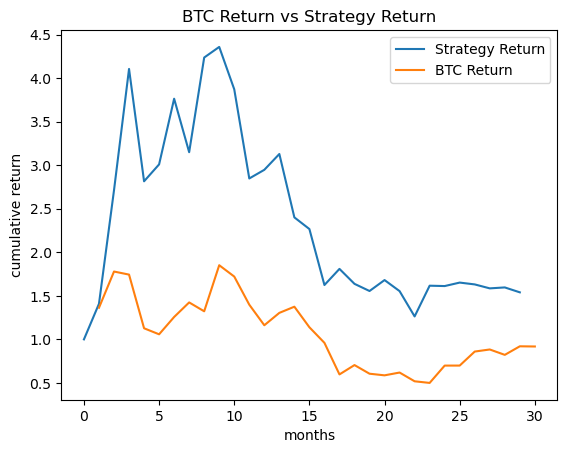

In [17]:
fig, ax = plt.subplots()
plt.plot((1+pflio(df_return,6,3)).cumprod())
plt.plot((1+df_return["BTC-USD_Returned"].reset_index(drop=True)).cumprod())
plt.title("BTC Return vs Strategy Return")
plt.ylabel("cumulative return")
plt.xlabel("months")
ax.legend(["Strategy Return","BTC Return"])